# Data Cleaning : Airbnb Listings
In this notebook we are going to deal with data from a well-known residential rental application, Airbnb. Specifically, the data for the Chicago area for 3 months of 2023 (January, February and March).

In [1]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Libraries used for Modelling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [3]:
# reading the csv files
listings_df = pd.read_csv("listings.csv")
reviews_df = pd.read_csv("reviews.csv")

## Data Cleaning : Listings.csv
1. We drop any entries that are missing (NaN) values.
2. We also drop any entries that are inconsistent such as price with a value of 0.

In [4]:
print(listings_df.shape)
listings_df.info()

(7747, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7747 entries, 0 to 7746
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7747 non-null   int64  
 1   name                            7747 non-null   object 
 2   host_id                         7747 non-null   int64  
 3   host_name                       7747 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7747 non-null   object 
 6   latitude                        7747 non-null   float64
 7   longitude                       7747 non-null   float64
 8   room_type                       7747 non-null   object 
 9   price                           7747 non-null   int64  
 10  minimum_nights                  7747 non-null   int64  
 11  number_of_reviews               7747 non-null   int64  
 12  last_review            

In [5]:
# determine the number of missing entries in each column of Listings.csv
for col in listings_df.columns:
    print (col + ', Number of Missing Values:', len(listings_df[col][listings_df[col].isnull()]))

id, Number of Missing Values: 0
name, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_name, Number of Missing Values: 0
neighbourhood_group, Number of Missing Values: 7747
neighbourhood, Number of Missing Values: 0
latitude, Number of Missing Values: 0
longitude, Number of Missing Values: 0
room_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
last_review, Number of Missing Values: 1493
reviews_per_month, Number of Missing Values: 1493
calculated_host_listings_count, Number of Missing Values: 0
availability_365, Number of Missing Values: 0
number_of_reviews_ltm, Number of Missing Values: 0
license, Number of Missing Values: 1174


#### According to the above output, neighbourhood_group, last_review, reviews_per_month, and license columns have missing values.

In [6]:
# Checking whether this column has only null values
if listings_df['neighbourhood_group'].isna().all():
    print("neighbourhood_group has all NaN values")
else:
    print("neighbourhood_group does not have all NaN values")

neighbourhood_group has all NaN values


In [7]:
# As neighbourhood_group has only null values and cannot be replaced with any other values, so this column has to be dropped.
listings_df.drop('neighbourhood_group', axis = 1, inplace = True)
#listings_df.to_csv('listings.csv', index=False)

In [8]:
#Let's check whether there are any listings with price 0.00 (inconsistent values)
print ('Number of Listings with Price $0.00:', len(listings_df[listings_df['price'] == 0.00]))

Number of Listings with Price $0.00: 2


In [9]:
#As there are two listings with price 0.00, let's drop those two listings.
listings_df = listings_df[listings_df['price'] != 0.00]
print ('Number of Listings with Price $0.00:', len(listings_df[listings_df['price'] == 0.00]))

Number of Listings with Price $0.00: 0


In [10]:
# Then, let's drop all the records with null values as the missing values for last_review, reviews_per_month and license columns cannot be replaced with any other values.
listings_df = listings_df.dropna()

In [11]:
for col in listings_df.columns:
    print (col + ', Number of Missing Values:', len(listings_df[col][listings_df[col].isnull()]))

id, Number of Missing Values: 0
name, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_name, Number of Missing Values: 0
neighbourhood, Number of Missing Values: 0
latitude, Number of Missing Values: 0
longitude, Number of Missing Values: 0
room_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
last_review, Number of Missing Values: 0
reviews_per_month, Number of Missing Values: 0
calculated_host_listings_count, Number of Missing Values: 0
availability_365, Number of Missing Values: 0
number_of_reviews_ltm, Number of Missing Values: 0
license, Number of Missing Values: 0


In [12]:
listings_df.shape

(5888, 17)

#### Our dataset is now clean and we no longer have any missing values or inconsistent values. We have a total of 5888 records from the original 7747; thus, we've retained a reasonable amount of records. 

## Data Cleaning : Reviews.csv

In [13]:
print(reviews_df.shape)
reviews_df.info()

(345939, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345939 entries, 0 to 345938
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     345939 non-null  int64 
 1   id             345939 non-null  int64 
 2   date           345939 non-null  object
 3   reviewer_id    345939 non-null  int64 
 4   reviewer_name  345939 non-null  object
 5   comments       345847 non-null  object
dtypes: int64(3), object(3)
memory usage: 15.8+ MB


In [14]:
# determine the number of missing entries in each column of reviews.csv
for col in reviews_df.columns:
    print (col + ', Number of Missing Values:', len(reviews_df[col][reviews_df[col].isnull()]))

listing_id, Number of Missing Values: 0
id, Number of Missing Values: 0
date, Number of Missing Values: 0
reviewer_id, Number of Missing Values: 0
reviewer_name, Number of Missing Values: 0
comments, Number of Missing Values: 92


#### According to the above output, only comments column has 92 missing values and these missing values cannot be replaced by any other values. Hence, the rows with missing values has to be dropped.

In [15]:
reviews_df = reviews_df.dropna()
reviews_df.shape

(345847, 6)

In [16]:
for col in reviews_df.columns:
    print (col + ', Number of Missing Values:', len(reviews_df[col][reviews_df[col].isnull()]))

listing_id, Number of Missing Values: 0
id, Number of Missing Values: 0
date, Number of Missing Values: 0
reviewer_id, Number of Missing Values: 0
reviewer_name, Number of Missing Values: 0
comments, Number of Missing Values: 0


#### Reviews dataset doesn't have any missing values. Hence Reviews dataset has been cleaned successfully.

In [17]:
#Renaming the "id" column name of the listings dataframe so that it has the same name as the "listing_id" column of reviews dataframe.
listings_df = listings_df.rename(columns={'id': 'listing_id'})
listings_df.head()

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to UChicago,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,90,3,212,2023-03-04,2.13,1,347,20,R17000015609
1,94450,Comfy Garden Suite in Andersonville,504470,Mark,Edgewater,41.97960,-87.66512,Entire home/apt,65,7,7,2022-12-01,0.88,1,178,7,R22000082956
2,145659,Trendy Roscoe Village 3BR/2BR walk to shops,683529,Joe,North Center,41.94342,-87.68121,Entire home/apt,198,2,59,2022-12-31,0.65,22,330,15,2209272
3,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,85,2,483,2023-02-26,2.89,1,279,48,R21000075737
4,189821,"Best in Chicago, private, amazing garden space",899757,Meighan,Logan Square,41.92918,-87.70219,Entire home/apt,202,3,598,2023-02-25,4.27,1,207,24,R21000062936


### Merging the two dataframes

In [18]:
# Merging the two dataframes with the common column "listing_id".
merged_df = pd.merge(listings_df, reviews_df, on='listing_id')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328458 entries, 0 to 328457
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   listing_id                      328458 non-null  int64  
 1   name                            328458 non-null  object 
 2   host_id                         328458 non-null  int64  
 3   host_name                       328458 non-null  object 
 4   neighbourhood                   328458 non-null  object 
 5   latitude                        328458 non-null  float64
 6   longitude                       328458 non-null  float64
 7   room_type                       328458 non-null  object 
 8   price                           328458 non-null  int64  
 9   minimum_nights                  328458 non-null  int64  
 10  number_of_reviews               328458 non-null  int64  
 11  last_review                     328458 non-null  object 
 12  reviews_per_mont

# Modelling


## Importing dataset

Based on the work done during Exploratory Data Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:

- Room Type
- Minimum Number of Nights
- Number of Reviews

As such, we single out these variables (together with price) to form a new dataframe.

In [19]:
polarity_reviews_df = pd.read_csv("polarity_reviews.csv")
listings_df1 = pd.merge(listings_df, polarity_reviews_df, on='listing_id', how='left')

In [20]:
listings_df1.dropna()
indices_to_keep = ~listings_df1.isin([np.nan, np.inf, -np.inf]).any(axis=1)
listings_df1 = listings_df1[indices_to_keep]

In [21]:
new_listings_df = listings_df1[['room_type','polarity_value','number_of_reviews', 'price']]
new_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328458 entries, 0 to 328837
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   room_type          328458 non-null  object 
 1   polarity_value     328458 non-null  float64
 2   number_of_reviews  328458 non-null  int64  
 3   price              328458 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.5+ MB


# Regression Models

Regression models are used to target a prediction value based on independent variables and it is mostly used for finding out the relationship between variables as well as prediction/forecasting.

Here, we use regression models to help predict the price based on the significant predictor variables identified in Exploratory Analysis.

Predictor Variables: room_type, number_of_reviews, minimum_nights
Response Variable: price
The following regression models will be carried out:

- Linear Regression

- Ridge Regression

- Lasso Regression

- Random Forest Regression

### Data Preparation

The following will be done to the data to ensure its fit into the different regression models:

- Encoding the categorical variables so that it can be fit into the regression models
- Separating the data into predictor and response variables
- Separating the data into training and testing sets (Training Sets: Testing Sets = 80% : 20%)

In [36]:
# One-hot encode the Categorial variables
transformed_df = pd.get_dummies(new_listings_df, columns=['room_type'])

#renaming some categories to remove '/' and blank spaces
new_transformed_df = transformed_df.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
new_transformed_df = new_transformed_df.rename(columns={'room_type_Hotel room': 'room_type_Hotel_room'})
new_transformed_df =new_transformed_df.rename(columns={'room_type_Private room': 'room_type_Private_room'})
new_transformed_df =new_transformed_df.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})

new_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328458 entries, 0 to 328837
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   polarity_value             328458 non-null  float64
 1   number_of_reviews          328458 non-null  int64  
 2   price                      328458 non-null  int64  
 3   room_type_Entire_home_apt  328458 non-null  uint8  
 4   room_type_Hotel_room       328458 non-null  uint8  
 5   room_type_Private_room     328458 non-null  uint8  
 6   room_type_Shared_room      328458 non-null  uint8  
dtypes: float64(1), int64(2), uint8(4)
memory usage: 11.3 MB


In [37]:
# Separating X and y for Modelling
new_transformed_df1 = new_transformed_df.drop('price', axis=1)
x = pd.DataFrame(new_transformed_df1) #Predictor Variables
y = pd.DataFrame(new_transformed_df["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=list(x.columns))
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328458 entries, 0 to 328457
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   polarity_value             328458 non-null  float64
 1   number_of_reviews          328458 non-null  float64
 2   room_type_Entire_home_apt  328458 non-null  float64
 3   room_type_Hotel_room       328458 non-null  float64
 4   room_type_Private_room     328458 non-null  float64
 5   room_type_Shared_room      328458 non-null  float64
dtypes: float64(6)
memory usage: 15.0 MB


In [38]:
# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Model 1: Linear Regression

Linear Regression is a machine learning algorithm that is based on supervised learning. It performs the regression task to predict a dependent variable value (in this case, price) based on given independent variables (in this case, the identified predictor variables).

It then tries to find a linear relationship between the variables and predicts the price based on the linear line.

Here, we have trained the model to follow the following formula:

Regression Problem : Price = a * (Predictor Variables) + b 

The above is a general formula, however, since we have multiple predictor variables, there will be more than 1 coefficient (one for each predictor variable).

In [39]:
# Creating and fitting the model
linreg = LinearRegression()     
linreg.fit(x_train, y_train)

LinearRegression()

In [41]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [168.0617703]

                  Predictors  Coefficients
0             polarity_value  8.120223e+00
1          number_of_reviews -2.090151e+01
2  room_type_Entire_home_apt -1.561286e+14
3       room_type_Hotel_room -5.490178e+13
4     room_type_Private_room -1.490878e+14
5      room_type_Shared_room -3.106412e+13



**Note that:** A positive coefficient indicates that as the predictor variable increases, the response variable also increases. A negative coefficient indicates that as the predictor variable increases, the response variable decreases.

In [42]:
# Predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(x_train)
testPredictionLR = linreg.predict(x_test)

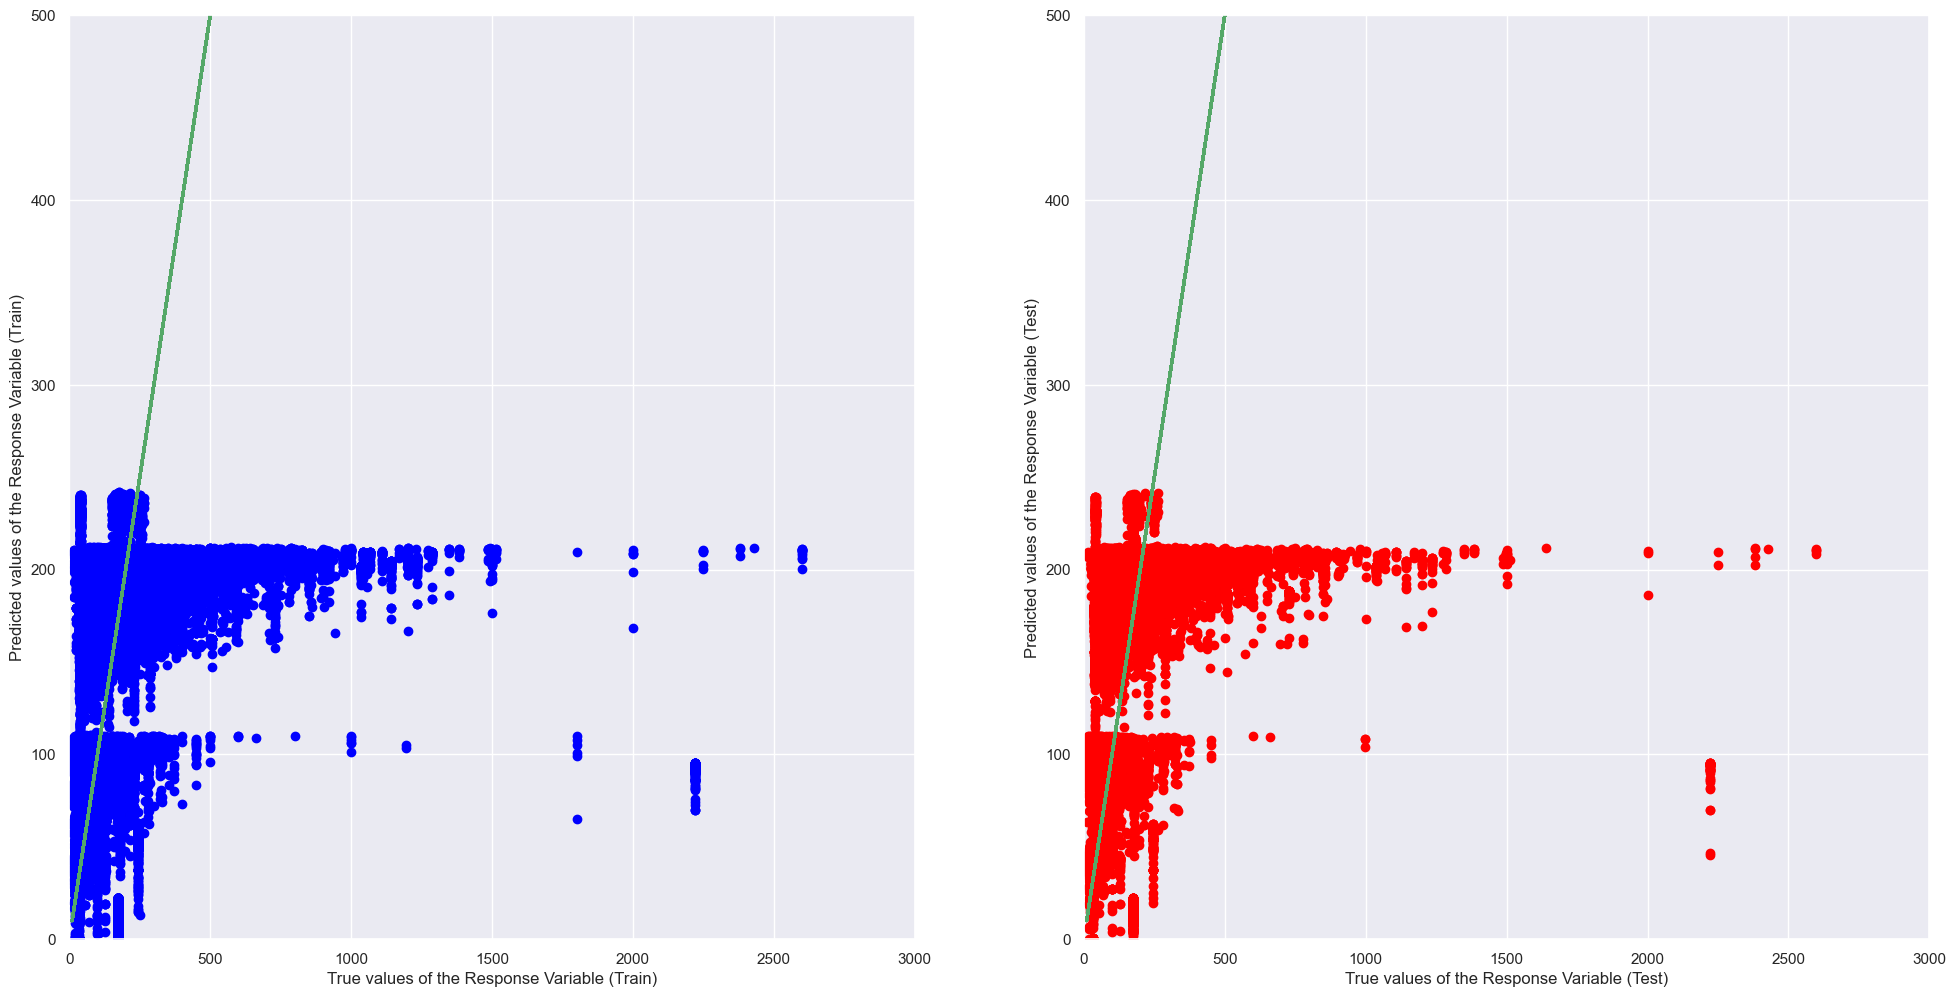

In [28]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_xlim([0, 3000])
axes[0].set_ylim([0, 500])
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlim([0, 3000])
axes[1].set_ylim([0, 500])
plt.show()

**Note that:** Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are  accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Model 2: Lasso Regression

Lasso Regression is meant to be an upgrade to linear regression, it also can be used for Regression and Classification.

Lasso Regression can be used for feature selection, where some predictors will be dropped after a lambda reaches a certain value.

Lasso Regression also requires a λ value to be iterated to find the best fit.

In [48]:
#numpy array used for plotting Lasso Regression later on
varArr = np.array(["polarity_value","number_of_reviews","room_type_Entire_home_apt","room_type_Hotel_room",
                              "room_type_Private_room", "room_type_Shared_room"])

In [65]:
#initialising the model
lassoReg = Lasso(alpha=1)
lassoReg.fit(x_train, y_train)
#stores prediction
lassoTrainPred = []
lassoTestPred = []
lassoR2score=[] #stores R2 value

lassoDF = pd.DataFrame({'variable': varArr, 'estimate': lassoReg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02)#lambda value of 0.01 to 8.01, in intervals of 0.02

for i,alpha in enumerate(lambdas):
    lassoReg = Lasso(alpha=alpha)
    lassoReg.fit(x_train, y_train)
    var_name = 'estimate'+ str(i+1)
    lassoDF = pd.concat([lassoDF, pd.DataFrame(lassoReg.coef_.ravel(), columns=[var_name], index=lassoDF.index)], axis=1)
    #prediction
    lassoTrainPred.append(lassoReg.predict(x_train))
    lassoTestPred.append(lassoReg.predict(x_test))
    #storing the r2 score 
    lassoR2score.append(lassoReg.score(x_train,y_train))


bestLassoR2 = max(lassoR2score)
print("The highest R2 value: ",bestLassoR2)


#Using the best fit Lasso Regression Model's predictions
trainPredictionLasso = lassoTrainPred[lassoR2score.index(bestLassoR2)]
testPredictionLasso = lassoTestPred[lassoR2score.index(bestLassoR2)]

lassoDF = lassoDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lassoDF.head()

The highest R2 value:  0.0011299006504962295


variable,1,polarity_value,number_of_reviews,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room
0,estimate,7.115915,-18.330777,0.000000,1.493923,-40.349278,-12.352884
1,estimate1,8.125881,-20.935670,38.981958,17.787357,-3.989098,-5.621995
2,estimate2,8.105512,-20.883510,33.278991,15.730313,-9.417363,-6.735971
3,estimate3,8.085136,-20.831152,29.460967,14.335979,-13.045689,-7.474907
4,estimate4,8.064760,-20.778794,25.642944,12.941645,-16.674016,-8.213844


(0.0, 500.0)

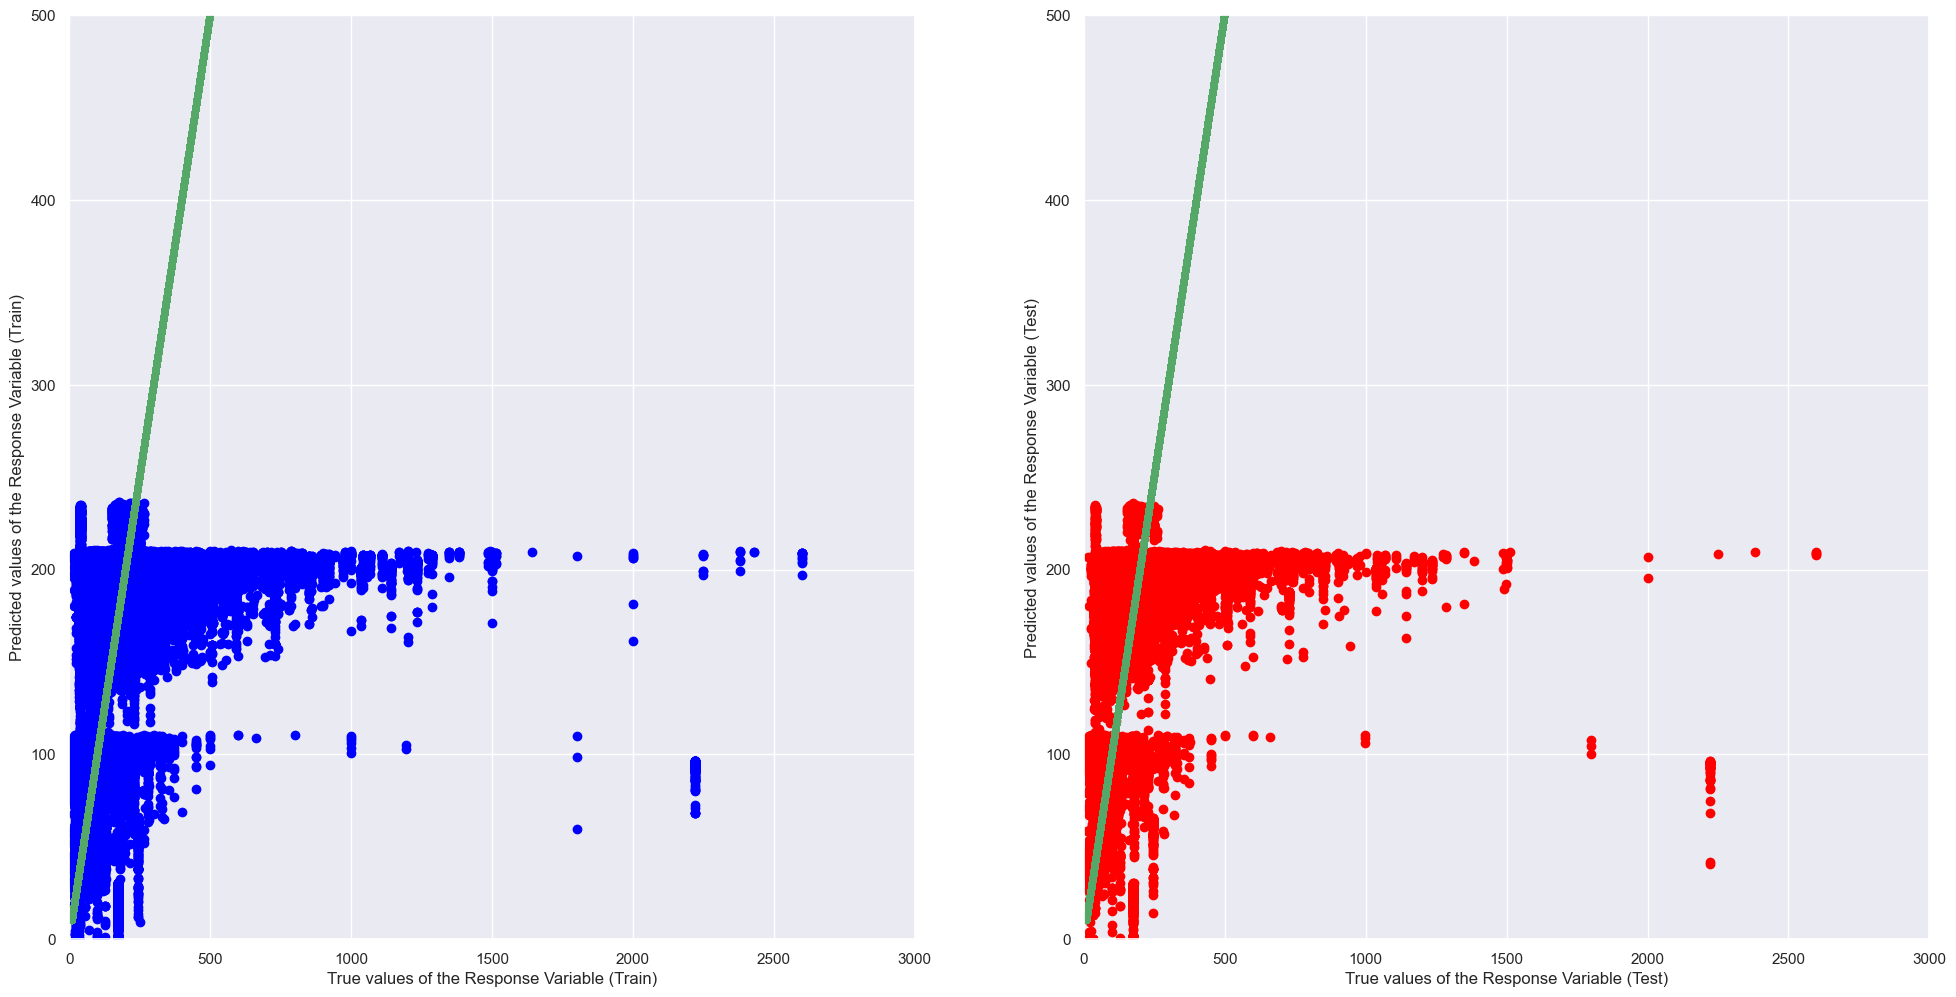

In [55]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_xlim([0, 3000])
axes[0].set_ylim([0, 500])
axes[1].scatter(y_test, testPredictionLasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlim([0, 3000])
axes[1].set_ylim([0, 500])

### Model 3 : Random Forest Regression

Random Forest is an emsemble technique that is able to perform both Regression and Classification tasks with the use of multiple decision trees and a technique that is called Bootstrap Aggression. The idea behind this technique is to combine multiple decision trees in its prediction rather than replying on individual decision trees.

Here, we use the RandomForestRegressor to help predict the price

In [64]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5)
RF.fit(x_train,y_train.values.ravel())
# Predicting the training and testing sets
trainPredictin_RF = RF.predict(x_train)
testPredictin_RF =RF.predict(x_test)

In [66]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=x_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

,Weight
room_type_Shared_room,0.000009
room_type_Hotel_room,0.000364
room_type_Private_room,0.006353
room_type_Entire_home_apt,0.030334
number_of_reviews,0.184977
polarity_value,0.777963


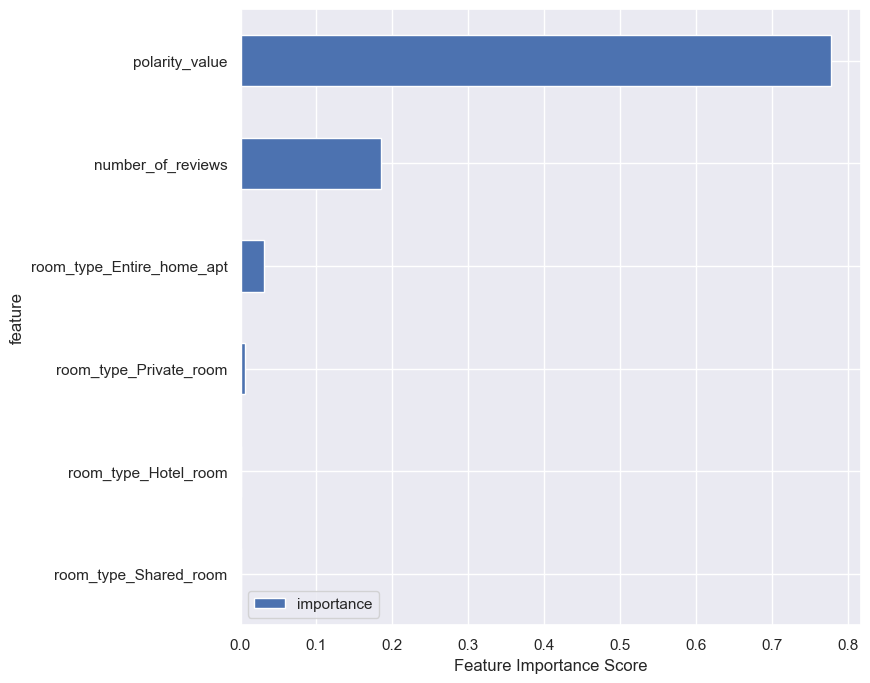

In [67]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = x_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

(0.0, 500.0)

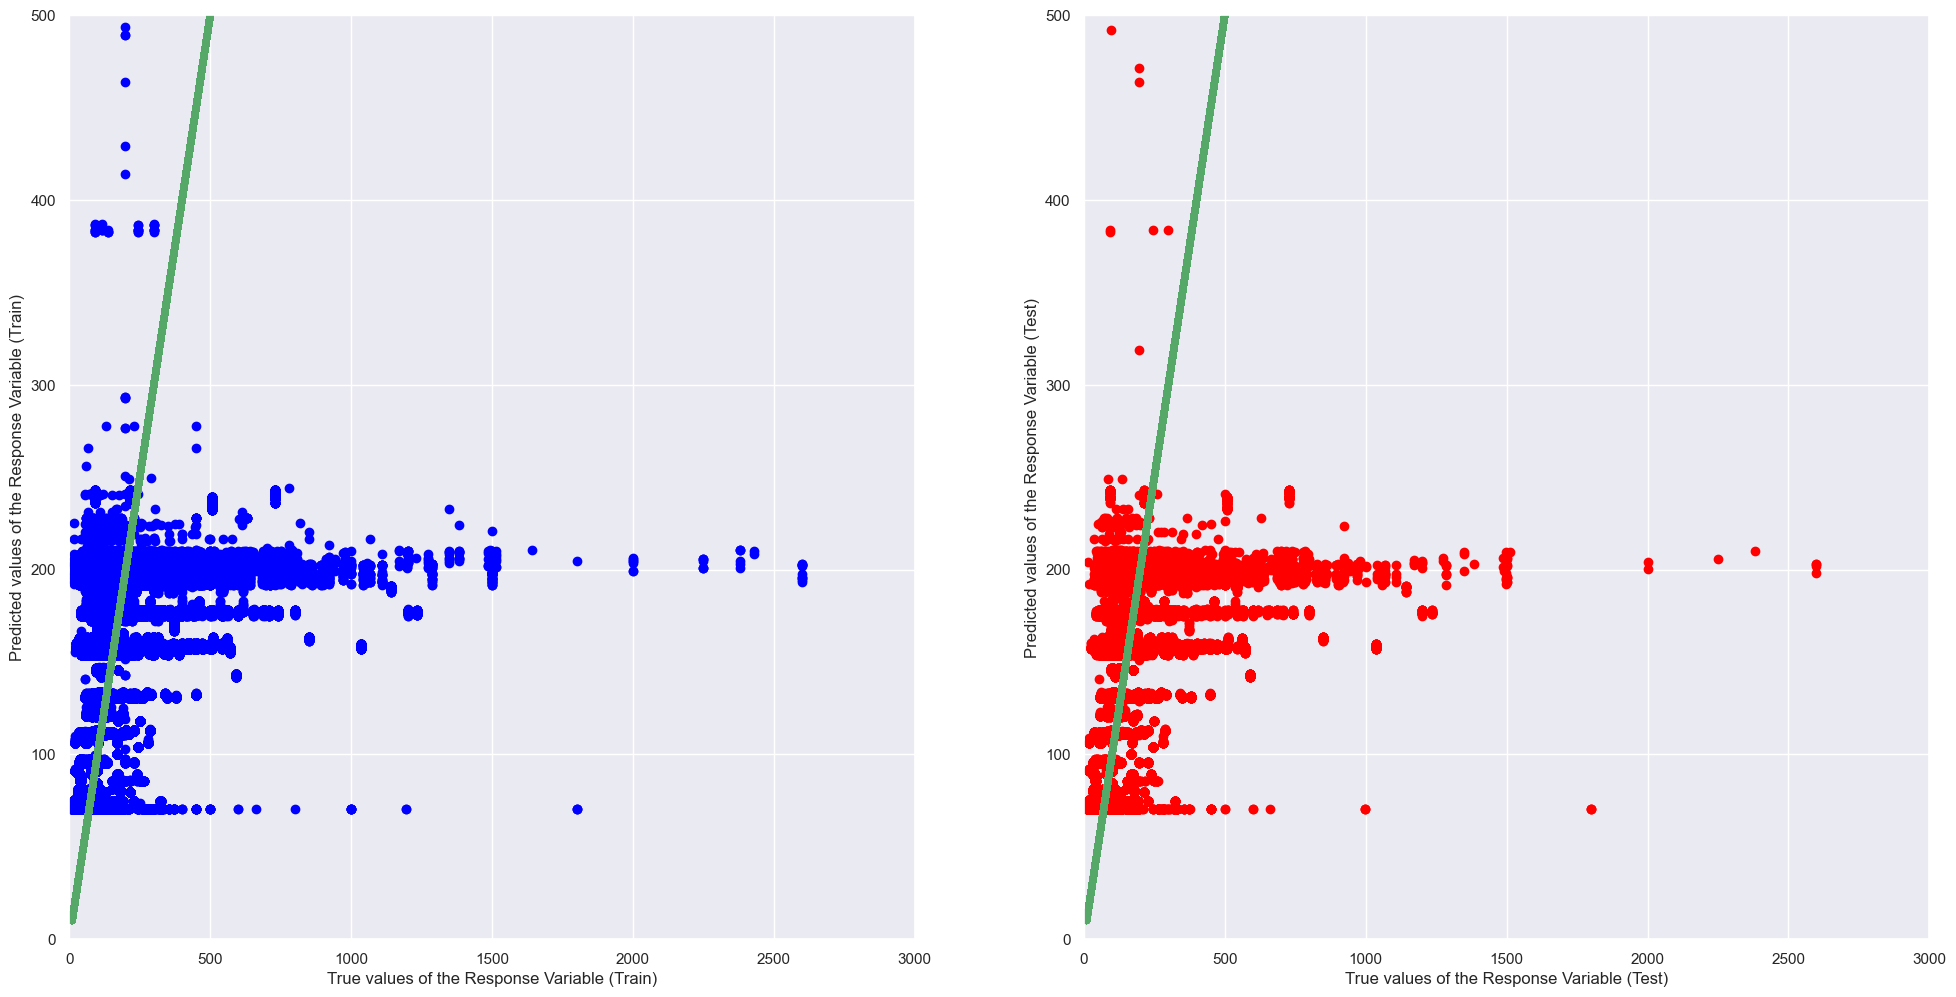

In [69]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_xlim([0, 3000])
axes[0].set_ylim([0, 500])
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlim([0, 3000])
axes[1].set_ylim([0, 500])

### Evaluation of Models

#### Train Test Split

Validation of model performance is done using Train/Test Set Split in which the data set is split into 80% : 20%.

In [70]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
print("Linear Regression (MSE):", round(mean_squared_error(y_test, testPredictionLR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, testPredictionLR),4))

print("\nLasso Regression (MSE):", round(mean_squared_error(y_test, testPredictionLasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_test, testPredictionLasso),4))

print("\nRandom Forest Regression (MSE):", round(mean_squared_error(y_test, testPredictin_RF),4))
print("Random Forest Regression (R^2):", round(r2_score(y_test, testPredictin_RF),4))
print()
print("\nPerformance Metrics for Train Set")
print("-----------------------------------")
print("Linear Regression (R^2):", round(r2_score(y_train, trainPredictionLR),4))
print("Lasso Regression (R^2):", round(r2_score(y_train, trainPredictionLasso),4))
print("Random Forest Regression (R^2):", round(r2_score(y_train, trainPredictin_RF),4))

Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 2054445.4515
Linear Regression (R^2): 0.0011

Lasso Regression (MSE): 2054445.6096
Lasso Regression (R^2): 0.0011

Random Forest Regression (MSE): 2005552.727
Random Forest Regression (R^2): 0.0249


Performance Metrics for Train Set
-----------------------------------
Linear Regression (R^2): 0.0011
Lasso Regression (R^2): 0.0011
Random Forest Regression (R^2): 0.2787
